In [2]:
pip install torch torchvision torchtext

  Using cached https://files.pythonhosted.org/packages/72/68/b82d188d09a40e681e8df5eeb91f71bb1facdc5c8a61a905350fa398a4a4/torchvision-0.7.0-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b8/ef/0d3dc1b8326f114900031c7096fae1ceea54065ebbc7648cd1c7a2c4dfc7/torchtext-0.7.0-cp37-cp37m-macosx_10_9_x86_64.whl
     |████████████████████████████████| 1.1MB 591kB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

# 1.tensor

In [12]:
"""
텐서는 가장 기본적인 자료구조 벡터와 행렬을 일반화한 개념 
차원/랭크
-0:스칼라{}
-1:1차원 벡터{n}
-2:2차원 행렬{n,m}
-n:n차원 텐서{n,m,o,...}
"""
example = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(example)
print("Size:", example.size())
print("Shape:", example.shape)
print("rank(dimension):", example.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
rank(dimension): 2


In [13]:
#unsqueeze() 텐서의 랭크 늘리기
example=torch.unsqueeze(example, 0)
print(example)
print("Size:", example.size())
print("Shape:", example.shape)
print("rank(dimension):", example.ndimension())
print()

#squeeze() 텐서의 랭크 중 크기가 1인 랭크를 삭제
example=torch.squeeze(example, 0)
print(example)
print("Size:", example.size())
print("Shape:", example.shape)
print("rank(dimension):", example.ndimension())
print()

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
rank(dimension): 3

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
rank(dimension): 2



In [15]:

#view() 직접 텐서의 모양 바꾸기
example=example.view(9) #rank:1인 [9]모양
print(example)
print("Size:", example.size())
print("Shape:", example.shape)
print("rank(dimension):", example.ndimension())
print()

try:
    example = example.view(1,3,3)
except Exception as e:
    print(e)
print(example)
print("Size:", example.size())
print("Shape:", example.shape)
print("rank(dimension):", example.ndimension())
print()

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
rank(dimension): 1

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
rank(dimension): 3



# 2. 텐서 연산
행렬곱을 하기 위해 A의 열의 수와 B의 행의 수가 같아야한다.

In [19]:
w = torch.randn(5,3, dtype = torch.float)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

b = torch.randn(5,2, dtype = torch.float)

print("w size:", w.size())
print("x size:", w.size())
print()
print("w:", w)
print("x:", x)
print()
print("b size:", b.size())
print("b:", b)
print()

wx = torch.mm(w,x)
print("wx size:", wx.size())
print("wx:", wx)
print()

result = wx + b
print("result size:", result.size())
print("result:", result)

w size: torch.Size([5, 3])
x size: torch.Size([5, 3])

w: tensor([[ 1.1845,  0.1860, -0.2204],
        [-0.3070, -0.0809, -0.5036],
        [ 0.0588, -0.3143, -0.4261],
        [ 1.2916, -0.6215,  0.2425],
        [ 1.0191,  0.5129, -0.5656]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

b size: torch.Size([5, 2])
b: tensor([[-0.4538, -0.4198],
        [ 0.9146, -1.0030],
        [-2.2062,  1.1608],
        [ 0.1049,  0.5492],
        [-1.5590, -0.5695]])

wx size: torch.Size([5, 2])
wx: tensor([[ 0.6407,  1.7909],
        [-3.0676, -3.9591],
        [-3.0146, -3.6962],
        [ 0.6398,  1.5525],
        [-0.2700,  0.6965]])

result size: torch.Size([5, 2])
result: tensor([[ 0.1869,  1.3711],
        [-2.1531, -4.9621],
        [-5.2208, -2.5354],
        [ 0.7447,  2.1017],
        [-1.8289,  0.1270]])


# 파이토치로 구현하는 신경망

## 신경망 모델 구현하기

# 3. Autograd
기울기를 자동으로 계산

In [20]:
w = torch.tensor(1.0, requires_grad = True)

a = w*3
l = a**2

l.backward()
print('l을 w로 미분한 값은 {}'.format(w.grad))

l을 w로 미분한 값은 18.0


# 4. 이미지 복원하기(feat. gradient descent)

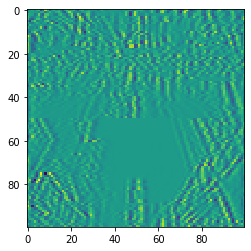

In [21]:
import pickle #오염된 이미지파일 로딩
#[10000]벡터 읽기
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1'))
plt.imshow(broken_image.view(100,100))

Loss at 0 = 12.267937660217285
Loss at 1000 = 1.1463332176208496
Loss at 2000 = 0.5585602521896362
Loss at 3000 = 0.3857250511646271
Loss at 4000 = 0.30428799986839294
Loss at 5000 = 0.2546287477016449
Loss at 6000 = 0.21939823031425476
Loss at 7000 = 0.19170807301998138
Loss at 8000 = 0.16834808886051178
Loss at 9000 = 0.1476709097623825
Loss at 10000 = 0.128766730427742
Loss at 11000 = 0.11110016703605652
Loss at 12000 = 0.09433957189321518
Loss at 13000 = 0.07826946675777435
Loss at 14000 = 0.0627436488866806
Loss at 15000 = 0.047659844160079956
Loss at 16000 = 0.03294501453638077
Loss at 17000 = 0.02112710289657116
Loss at 18000 = 0.021164383739233017
Loss at 19000 = 0.021167093887925148
Loss at 20000 = 0.02116783894598484
Loss at 21000 = 0.021168194711208344
Loss at 22000 = 0.02116815745830536
Loss at 23000 = 0.021171320229768753
Loss at 24000 = 0.02117323689162731
Loss at 25000 = 0.02117108181118965
Loss at 26000 = 0.021171491593122482
Loss at 27000 = 0.021170170977711678
Loss at

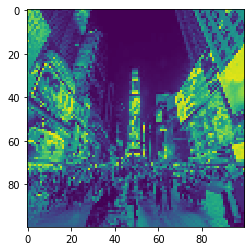

In [25]:
def weird_function(x, n_iter=5): #원리는 이해하지 못해도 됨
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

random_tensor = torch.randn(10000, dtype=torch.float)

lr = 0.8

for i in range(0,50000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward() #loss를 random_tensor로 미분

    with torch.no_grad(): #직접 경사하강법 구현
        random_tensor = random_tensor - lr * (random_tensor.grad) #random_tensor.grad에 앞에서 계산한 loss의 기울기가 저장되어있음
    
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

plt.imshow(random_tensor.view(100,100).data)


# 5. 인공신경망 (ANN, artificial neural network)

In [26]:
#데이터셋 만들기
n_dim = 2
#make_blobs() 함수로 2차원 벡터와 라벨을 생성한다(넘파이 벡터 형식). 사이킷런의 예제용 데이터 생성 함수
#0,1,2,3 네개의 클러스터
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [27]:
#4개의 클러스터를 두개로 합친다.
#0,1 -> 0
#2,3 -> 1
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

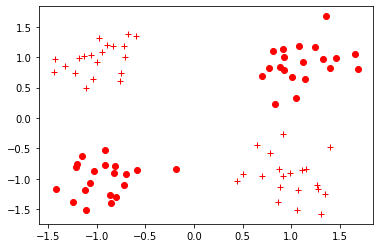

In [28]:
#시각화
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [29]:
#넘파이 벡터 형식 데이터를 파이토치 텐서로 바꿈
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [30]:
#신경망 모델 구현
class NeuralNet(torch.nn.Module): #신경망 모듈 'torch.nn.Module'를 상속받는다. 각종 도구를 쉽게 적용가능
        def __init__(self, input_size, hidden_size): #신경망의 구조와 동작을 정의하는 생성자. 속성값을 초기화한다.
            super(NeuralNet, self).__init__() #우리가 만든 NeuralNet 클래스가 nn.Module 클래스의 속성들로 초기화된다.

            self.input_size = input_size #신경망에 입력되는 데이터의 차원
            self.hidden_size  = hidden_size

            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size) #Linear()는 행렬곱과 bias합 연산을 지원하는 객체 반환.
            self.relu = torch.nn.ReLU() #nn.ReLU() 클래스인것 같다. 가중치가 없으니 다음 장에서처럼 nn.functional.relu함수를 사용할수 있다.(이때는 forward에서 사용)
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor) #[1, hidden_size]텐서 반환
            relu = self.relu(linear1)
            linear2 = self.linear_2(relu) #[1,1]텐서 반환
            output = self.sigmoid(linear2) #0~1 사잇값으로 반환
            return output

In [31]:
#객체 생성, 변수, 알고리즘 정의
model = NeuralNet(2, 5) #input 2, hidden 5
learning_rate = 0.03
criterion = torch.nn.BCELoss() #binary cross entropy / loss 계산 클래스가 두개뿐
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) #stochastic gradient descent 
#optimization (새 가중치 = 기존 가중치 - 학습률 * 가중치에 대한 loss의 기울기)
#step()함수를 부를때마다 가중치를 갱신

In [32]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test) #모델의 결과값과 라벨값의 차원맞추고 loss구하기
print('Before Training, test loss is {}'.format(test_loss_before.item())) #item()은 텐서 속의 숫자를 스칼라 값으로 반환한다.
#100번중 68번은 틀린다는 의미

Before Training, test loss is 0.6839405298233032


오차값이 0.73 이 나왔습니다. 이정도의 오차를 가진 모델은 사실상 분류하는 능력이 없다고 봐도 무방합니다.
자, 이제 드디어 인공신경망을 학습시켜 퍼포먼스를 향상시켜 보겠습니다.

In [33]:
for epoch in range(epochs):
    model.train() #학습모드로 바꾼다.
    optimizer.zero_grad() #각 epoch마다 새로운 기울기를 계산하기 때문에 0으로 설정
    train_output = model(x_train) #데이터셋을 넣어 결과값을 얻는다.
    train_loss = criterion(train_output.squeeze(), y_train) #차원을 맞추고 loss계산
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward() #오차함수를 가중치로 미분
    optimizer.step() #파라미터 갱신

Train loss at 0 is 0.6884474158287048
Train loss at 100 is 0.6643425226211548
Train loss at 200 is 0.6282249689102173
Train loss at 300 is 0.5690837502479553
Train loss at 400 is 0.47895723581314087
Train loss at 500 is 0.3742380738258362
Train loss at 600 is 0.2865127623081207
Train loss at 700 is 0.22873573005199432
Train loss at 800 is 0.19000904262065887
Train loss at 900 is 0.16171538829803467
Train loss at 1000 is 0.14078378677368164
Train loss at 1100 is 0.1248898059129715
Train loss at 1200 is 0.11243264377117157
Train loss at 1300 is 0.1023099422454834
Train loss at 1400 is 0.09383741766214371
Train loss at 1500 is 0.08661298453807831
Train loss at 1600 is 0.08037398010492325
Train loss at 1700 is 0.07494016736745834
Train loss at 1800 is 0.07017643004655838
Train loss at 1900 is 0.06597807258367538


In [34]:
#학습이 끝나고 학습된 모델의 성능을 시험
model.eval() #평가 모드
test_loss = criterion(model(x_test).squeeze(), y_test) #테스트셋으로 loss구하기
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.10288487374782562


학습을 하기 전과 비교했을때 현저하게 줄어든 오차값을 확인 하실 수 있습니다.
지금까지 인공신경망을 구현하고 학습시켜 보았습니다.
이제 학습된 모델을 .pt 파일로 저장해 보겠습니다.

In [35]:
#학습된 모델을 state_dict()함수의 형태로 변환하여 .pt 파일로 저장
#모델 내 가중치들이 딕셔너리 형태로 표현된 데이터. 
#{연산 이름:가중치 텐서와 bias 텐서}
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-0.3885, -0.0233],
        [ 1.2624,  1.8642],
        [ 0.0575, -0.4088],
        [-1.9280, -1.3989],
        [-1.2921,  1.3884]])), ('linear_1.bias', tensor([-0.6661, -0.1178, -0.7209, -0.2613, -0.0550])), ('linear_2.weight', tensor([[ 0.0111, -2.1612, -0.2476, -2.3507,  1.7647]])), ('linear_2.bias', tensor([2.0762]))])


`save()` 를 실행하고 나면 학습된 신경망의 가중치를 내포하는 model.pt 라는 파일이 생성됩니다. 아래 코드처럼 새로운 신경망 객체에 model.pt 속의 가중치값을 입력시키는 것 또한 가능합니다.

In [36]:
#새로운 모델에 이미 학습된 모델의 가중치를 곧바로 적용
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.993529736995697
